In [307]:
import pandas as pd
import numpy as np

In [ ]:
csv = 'auto_file.csv' 

In [15]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [16]:
df = pd.read_csv(csv, names=headers)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   symboling          201 non-null    int64   
 1   normalized-losses  201 non-null    int32   
 2   make               201 non-null    object  
 3   fuel-type          201 non-null    object  
 4   aspiration         201 non-null    object  
 5   num-of-doors       201 non-null    object  
 6   body-style         201 non-null    object  
 7   drive-wheels       201 non-null    object  
 8   engine-location    201 non-null    object  
 9   wheel-base         201 non-null    float64 
 10  length             201 non-null    float64 
 11  width              201 non-null    float64 
 12  height             201 non-null    float64 
 13  curb-weight        201 non-null    int64   
 14  engine-type        201 non-null    object  
 15  num-of-cylinders   201 non-null    object  
 16  engine-s

#### Identifying duplicated rows in data

In [306]:
df.duplicated().sum()

0

#### Identifying and handling missing values

In [20]:
df.replace('?', np.nan, inplace=True)

To identify the missing data use isna() / isnull() (the equivalent of isna) method or notna()/notnull()

In [120]:
missing_data = df.isna()
missing_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [51]:
for column in missing_data.columns.values.tolist(): # iterates over a list of column names
    if len(missing_data[column].value_counts()) == 2: # print only info about columns with missing values
        print(missing_data[column].value_counts()) # count number of missing (True) and not missing (False) data
        print('')

False    164
True      41
Name: normalized-losses, dtype: int64

False    203
True       2
Name: num-of-doors, dtype: int64

False    201
True       4
Name: bore, dtype: int64

False    201
True       4
Name: stroke, dtype: int64

False    203
True       2
Name: horsepower, dtype: int64

False    203
True       2
Name: peak-rpm, dtype: int64

False    201
True       4
Name: price, dtype: int64



##### Ways to deal with missing data:

Drop rows or columns.

Replace data.

1. Replace it by mean.
2. Replace it by frequency.
3. Replace it based on other functions.

Replacing missing values in a column with the mean for that column:

In [52]:
avg_norm_loss = df['normalized-losses'].astype('float').mean(axis=0)
print(avg_norm_loss)
df['normalized-losses'].replace(np.nan, avg_norm_loss, inplace=True)

Average of normalized-losses: 122.0


Function for replacing missing values in a column with the mean for that column:

In [145]:
def nan_to_mean(*columns, df_name, type_ , axis=0):
    for col in columns:
        avg_col = df_name[col].astype(type_).mean(axis=axis)
        print(f'Average of {col}: {avg_col}')
        df_name[col].replace(np.nan, avg_col, inplace=True)

In [146]:
nan_to_mean("horsepower","peak-rpm",'bore', 'stroke', df_name=df, type_='float')

Average of horsepower: 104.25615763546797
Average of peak-rpm: 5125.369458128079
Average of bore: 3.329751243781096
Average of stroke: 3.2554228855721337


Method idxmax() shows the most common value in a column/row:

In [ ]:
print('Columns:  The most common value:\n')
for col, most_common in zip(df.columns.values, df.value_counts().idxmax()):
    print(f'{col}:  {most_common}')

In [224]:
# Columns and their's most common values as a DataFrame:
d = {'Columns': [], 'The_most_common_value': []}
for col, most_common in zip(df.columns.values, df.value_counts().idxmax()):
    d['Columns'].append(col)
    d['The_most_common_value'].append(most_common)
    
pd.DataFrame(d)

,Columns,The most common value
0,symboling,-2
1,normalized-losses,103
2,make,volvo
3,fuel-type,gas
4,aspiration,std
5,num-of-doors,four
6,body-style,sedan
7,drive-wheels,rwd
8,engine-location,front
9,wheel-base,104.3


In [225]:
# Replace the missing 'num-of-doors' values by the most frequent value:
df["num-of-doors"].replace(np.nan, "four", inplace=True)

Drop rows with NaN values in 'price' columns:

In [226]:
df.dropna(subset=["price"], axis=0, inplace=True)

# reseting index after dropping some of the rows:
df.reset_index(drop=True, inplace=True)

### Data format

In [229]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [231]:
# Changing format of the data:

In [279]:
df[["bore", "stroke", "price", "peak-rpm"]] = df[["bore", "stroke", "price", "peak-rpm"]].astype("float")
df["normalized-losses"] = df["normalized-losses"].astype("int")
df.dtypes

symboling               int64
normalized-losses       int32
make                   object
fuel-type              object
aspiration             object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower              int32
peak-rpm              float64
city-mpg                int64
highway-mpg             int64
price                 float64
horsepower-binned    category
dtype: object

#### Data Standardization
Standardization is the process of transforming data into a common format, allowing the researcher to make the meaningful comparison.

In [294]:
#Transform mpg to L/100km. The formula for unit conversion is: L/100km = 235 / mpg
df['city-L/100km'] = 235/df["city-mpg"]
df.drop(columns="city-mpg", inplace=True)
df['highway-L/100km'] = 235/df["highway-mpg"]
df.drop(columns="highway-mpg", inplace=True)

### Data Normalization
Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling the variable so the variable values range from 0 to 1.

In [ ]:
# replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

#### Indicator Variable (or Dummy Variable)
An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning.

Method 'get_dummies' assigns numerical values to different categories and stores them in separate columns.

In [234]:
dummy_var1 = pd.get_dummies(df['fuel-type'])
dummy_var1.tail(50)

In [ ]:
# Change the column names for clarity:
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, 
                        inplace=True)

# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

### Binning
Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.

In [242]:
df["horsepower"]=df["horsepower"].astype(int, copy=True)

Text(0.5, 1.0, 'horsepower distribution')

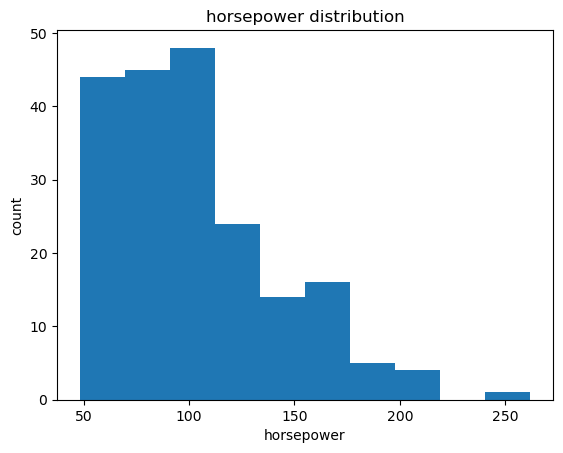

In [277]:
# horsepower distribution
from matplotlib import pyplot
pyplot.hist(df["horsepower"])

# set x/y labels and plot title
pyplot.xlabel("horsepower")
pyplot.ylabel("count")
pyplot.title("horsepower distribution")

In [251]:
group_names = ['Low', 'Medium', 'High']

#### Cut() function 
Helps to segment and sort data values into bins.

<a href='https://pandas.pydata.org/docs/reference/api/pandas.cut.html'>Pandas cut function</a>

In [278]:
df['horsepower-binned'] = pd.cut(df['horsepower'], 3, labels=group_names, include_lowest=True)
print(df['horsepower-binned'].value_counts())
df[['horsepower','horsepower-binned']].head(20)

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64


,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


Text(0.5, 1.0, 'horsepower bins')

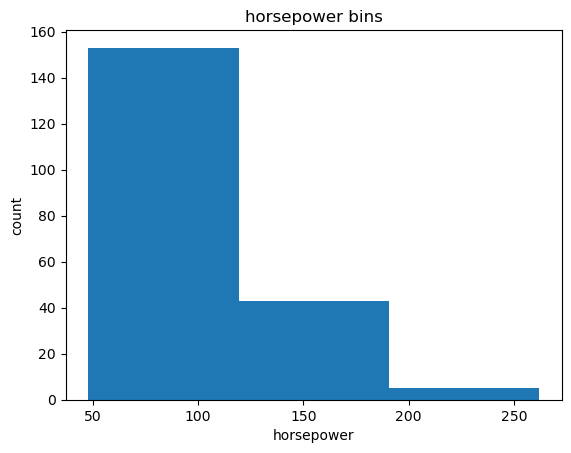

In [255]:
# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Create categorical variable with similar numbers of record in bins

In [297]:
groups = pd.qcut(df['horsepower'],3, ['low', 'medium', 'high'], retbins=True)

In [299]:
groups

(0      medium
 1      medium
 2        high
 3      medium
 4        high
         ...  
 196      high
 197      high
 198      high
 199    medium
 200      high
 Name: horsepower, Length: 201, dtype: category
 Categories (3, object): ['low' < 'medium' < 'high'],
 array([ 48.,  82., 111., 262.]))

#### Save data as csv:

In [ ]:
df.to_csv("automobile.csv", index=False)